# 第10部　統計学と機械学習

## 3章　PythonによるRidge回帰・Lasso回帰

### 実装：分析の準備

In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
from scipy import stats
# 表示桁数の設定
pd.set_option('display.precision', 3)
np.set_printoptions(precision=3)

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 統計モデルを推定するライブラリ
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 機械学習法を適用するためのライブラリ
from sklearn import linear_model

In [2]:
# 表示設定(書籍本文のレイアウトと合わせるためであり、必須ではありません)
np.set_printoptions(linewidth=60)
pd.set_option('display.width', 60)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4

In [3]:
# ファイルからのデータ読み込み
X = pd.read_csv('10-3-1-large-data.csv')
print(X.head(3))

     X_1    X_2    X_3    X_4    X_5    X_6    X_7    X_8  \
0  1.000  0.500  0.333  0.250  0.200  0.167  0.143  0.125   
1  0.500  0.333  0.250  0.200  0.167  0.143  0.125  0.111   
2  0.333  0.250  0.200  0.167  0.143  0.125  0.111  0.100   

     X_9   X_10  ...   X_91   X_92   X_93   X_94   X_95  \
0  0.111  0.100  ...  0.011  0.011  0.011  0.011  0.011   
1  0.100  0.091  ...  0.011  0.011  0.011  0.011  0.010   
2  0.091  0.083  ...  0.011  0.011  0.011  0.010  0.010   

   X_96  X_97  X_98  X_99  X_100  
0  0.01  0.01  0.01  0.01   0.01  
1  0.01  0.01  0.01  0.01   0.01  
2  0.01  0.01  0.01  0.01   0.01  

[3 rows x 100 columns]


### 実装：説明変数の標準化

In [4]:
# X_1の平均値
round(np.mean(X.X_1), 3)

0.037

In [5]:
# すべての説明変数の平均値
np.mean(X, axis=0).head(3)

X_1    0.037
X_2    0.031
X_3    0.027
dtype: float64

In [6]:
# 標準化
X -= np.mean(X, axis=0)
X /= np.std(X, ddof=1, axis=0)

In [7]:
# 確認
np.mean(X, axis=0).head(3).round(3)

X_1   -0.0
X_2   -0.0
X_3    0.0
dtype: float64

In [8]:
# 確認
np.std(X, ddof=1, axis=0).head(3).round(3)

X_1    1.0
X_2    1.0
X_3    1.0
dtype: float64

### 実装：シミュレーションで応答変数を作る

In [9]:
# 応答変数を作る

# 正規分布に従うノイズ
np.random.seed(1)
noise =  stats.norm.rvs(loc=0, scale=1, size=X.shape[0])

# 正しい係数は5として応答変数を作る
y =  X.X_1 * 5 + noise

C:\Users\kakim\scoop\apps\python\current\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kakim\scoop\apps\python\current\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


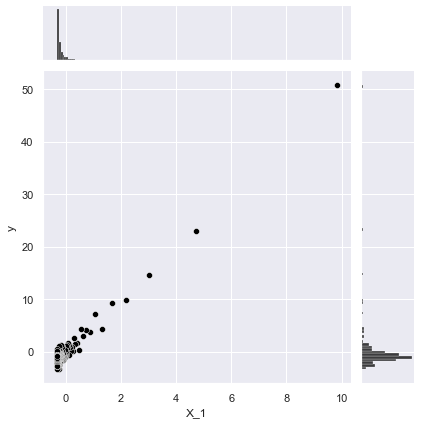

In [10]:
# 応答変数と説明変数をまとめる
large_data = pd.concat([pd.DataFrame({'y':y}), X], axis=1)
# 散布図の作成
sns.jointplot(y='y', x='X_1', data=large_data,
              color='black')

### 実装：普通の最小二乗法を適用する

In [11]:
lm_statsmodels = sm.OLS(endog=y, exog=X).fit()
lm_statsmodels.params.head(3)

X_1     14.755
X_2    -87.463
X_3    211.743
dtype: float64

### 実装：sklearnによる線形回帰

In [12]:
# どんなモデルを作るかをまずは指定
lm_sklearn = linear_model.LinearRegression()
# データを指定して、モデルを推定
lm_sklearn.fit(X, y)
# 推定されたパラメータ(array型)
lm_sklearn.coef_

array([ 1.476e+01, -8.746e+01,  2.117e+02, -9.415e+01,
       -6.817e+01, -9.284e+01,  1.761e+00,  8.170e+01,
        6.680e+01,  2.788e+01, -3.288e+01,  6.818e+01,
       -1.699e+01,  2.208e+01, -4.855e+01, -3.390e+01,
       -4.536e+01,  9.728e+00,  2.481e+01,  1.858e+00,
        1.599e+00, -2.838e+01,  6.477e+00, -5.980e+01,
        3.532e+01, -1.302e+01,  4.108e+01, -4.303e+01,
        5.247e+01,  1.920e+00,  3.342e+01,  8.490e+00,
        8.329e+00, -2.293e+01, -3.577e+01, -1.337e+01,
        3.178e+01, -2.018e+01, -2.654e+01, -3.523e+01,
        1.927e+01,  4.823e+01, -1.655e+00,  5.749e-01,
       -1.893e+01,  7.370e-01,  1.047e+01, -7.732e+00,
       -1.854e+00, -2.559e-01, -5.045e+00, -4.227e+00,
        2.523e+01,  1.616e+01, -1.310e+01,  6.455e+00,
       -1.332e+01, -2.291e+01, -1.202e+01,  7.745e+00,
        1.755e+01,  5.997e+00,  4.648e+00,  4.120e+00,
       -1.825e+00,  5.366e+00,  4.546e+00, -2.598e+00,
       -4.091e+00,  7.496e+00,  3.100e+01,  1.530e+01,
       -5.

### 実装：Ridge回帰-罰則項の影響

In [13]:
# αを変化させる
n_alphas = 50
ridge_alphas = np.logspace(-2, 0.7, n_alphas)

In [14]:
# ridge_alphasの対数をとった結果
np.log10(ridge_alphas)

array([-2.   , -1.945, -1.89 , -1.835, -1.78 , -1.724,
       -1.669, -1.614, -1.559, -1.504, -1.449, -1.394,
       -1.339, -1.284, -1.229, -1.173, -1.118, -1.063,
       -1.008, -0.953, -0.898, -0.843, -0.788, -0.733,
       -0.678, -0.622, -0.567, -0.512, -0.457, -0.402,
       -0.347, -0.292, -0.237, -0.182, -0.127, -0.071,
       -0.016,  0.039,  0.094,  0.149,  0.204,  0.259,
        0.314,  0.369,  0.424,  0.48 ,  0.535,  0.59 ,
        0.645,  0.7  ])

In [15]:
# αを変えて何度もRidge回帰を実行

# 推定された回帰係数を格納するリスト
ridge_coefs = []
# forループで何度もRidge回帰を推定する
for a in ridge_alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    ridge_coefs.append(ridge.coef_)

In [16]:
# アレイに変換
ridge_coefs = np.array(ridge_coefs)
ridge_coefs.shape

(50, 100)

(-8.0, 10.5)

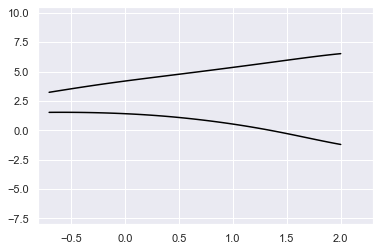

In [17]:
# 参考：αを2回だけ変化させた結果(書籍には載っていないコードです)

log_alphas = -np.log10(ridge_alphas)
plt.plot(log_alphas, ridge_coefs[::,0], color='black')
plt.plot(log_alphas, ridge_coefs[::,1], color='black')

plt.xlim([min(log_alphas)-0.1, max(log_alphas) + 0.3])
plt.ylim([-8, 10.5])

Text(0, 0.5, 'Coefficients')

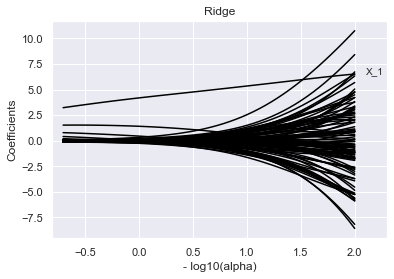

In [18]:
# X軸に-log10(α)、Y軸に係数を置いた折れ線グラフ
# 100回繰り返さなくても、自動で線を100本引いてくれる

# αを変換
log_alphas = -np.log10(ridge_alphas)
# X軸に-log10(α)、Y軸に係数を置いた折れ線グラフ
plt.plot(log_alphas, ridge_coefs, color='black')
# 説明変数X_1の係数がわかるように目印を入れる
plt.text(max(log_alphas) + 0.1, ridge_coefs[0,0], 'X_1')
# X軸の範囲
plt.xlim([min(log_alphas) - 0.1, max(log_alphas) + 0.3])
# 軸ラベル
plt.title('Ridge')
plt.xlabel('- log10(alpha)')
plt.ylabel('Coefficients')

### 実装：Ridge回帰-最適な正則化の強度の決定

In [19]:
# CVで最適なαを求める
ridge_best = linear_model.RidgeCV(
    cv=10, alphas=ridge_alphas, fit_intercept=False)
ridge_best.fit(X, y) 

# 最適な-log10(α)
round(-np.log10(ridge_best.alpha_), 3)

0.237

In [20]:
# 最適なα
round(ridge_best.alpha_, 3)

0.58

In [21]:
# 最適なαの時の、回帰係数
ridge_best.coef_.round(2)

array([ 4.46,  1.29,  0.29, -0.09, -0.2 , -0.23, -0.22,
       -0.21, -0.14, -0.14, -0.15, -0.05, -0.1 , -0.02,
       -0.11, -0.01, -0.09,  0.01, -0.02, -0.03,  0.02,
       -0.03,  0.04, -0.09,  0.13,  0.02,  0.06, -0.08,
        0.14, -0.01,  0.1 ,  0.12, -0.04,  0.04, -0.03,
        0.02,  0.12, -0.17, -0.01, -0.18,  0.09,  0.22,
        0.04, -0.03, -0.01,  0.03,  0.34, -0.19, -0.11,
        0.21, -0.13, -0.25,  0.25,  0.13, -0.16,  0.27,
        0.03, -0.17, -0.18,  0.16, -0.01,  0.01,  0.19,
        0.13, -0.16, -0.02,  0.26,  0.22, -0.18,  0.01,
        0.53,  0.18, -0.35, -0.12,  0.23, -0.04, -0.12,
       -0.05,  0.21,  0.19, -0.04, -0.2 , -0.1 ,  0.06,
       -0.22,  0.15, -0.04, -0.11,  0.21,  0.01,  0.13,
       -0.03, -0.02, -0.23, -0.2 ,  0.24, -0.31, -0.4 ,
       -0.16,  0.16])

###  実装：Lasso回帰-罰則項の影響

In [22]:
# αを変えて何度もLasso回帰を実行
lasso_alphas, lasso_coefs, _ = linear_model.lasso_path(
    X, y, fit_intercept=False)

ValueError: ('Unexpected parameters in params', dict_keys(['fit_intercept']))

Text(0, 0.5, 'Coefficients')

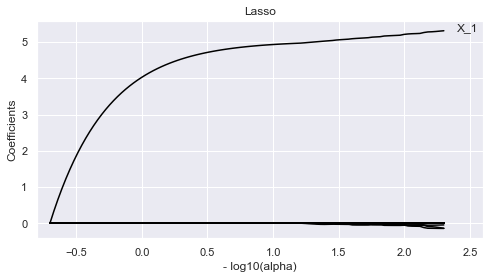

In [23]:
# Lasso回帰のsolution-path

# αを変換
log_alphas = -np.log10(lasso_alphas)
# X軸に-log10(α)、Y軸に係数を置いた折れ線グラフ
plt.plot(log_alphas, lasso_coefs.T, color='black')
# 説明変数X_1の係数がわかるように目印を入れる
plt.text(max(log_alphas) + 0.1, lasso_coefs[0, -1], 'X_1')
# X軸の範囲
plt.xlim([min(log_alphas)-0.1, max(log_alphas) + 0.3])
# 軸ラベル
plt.title('Lasso')
plt.xlabel('- log10(alpha)')
plt.ylabel('Coefficients')

### 実装：Lasso回帰-最適な正則化の強度の決定

In [24]:
# CVで最適なαを求める
lasso_best = linear_model.LassoCV(
    cv=10, alphas=lasso_alphas, fit_intercept=False)
lasso_best.fit(X, y)

# 最適な-log(α)
round(-np.log10(lasso_best.alpha_), 3)

2.301

In [25]:
# 最適なα
round(lasso_best.alpha_, 3)

0.005

In [26]:
# 最適なαの時の、回帰係数
lasso_best.coef_.round(2)

array([ 5.34, -0.  , -0.  , -0.3 , -0.04, -0.  , -0.  ,
       -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  ,
       -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  ,
       -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  ,
        0.  , -0.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.  ,
        0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.01,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ])

### 実装：Lasso回帰による予測

In [27]:
# 説明変数
print(X.iloc[0:1, ])

     X_1    X_2    X_3    X_4    X_5    X_6    X_7    X_8  \
0  9.828  8.123  7.108  6.429  5.937  5.561  5.261  5.013   

     X_9   X_10  ...   X_91   X_92   X_93   X_94   X_95  \
0  4.805  4.628  ...  2.396  2.401  2.405  2.354  2.354   

    X_96   X_97  X_98   X_99  X_100  
0  2.354  2.353  2.35  2.346  2.342  

[1 rows x 100 columns]


In [28]:
# 当てはめ値
lasso_best.predict(X=X.iloc[0:1, ])

array([50.263])

In [29]:
# 参考：訓練データ(正解データ)
# (書籍には載っていないコードです)
y[0]

50.76210216471847

In [30]:
# 参考：すべての訓練データに対する当てはめ値の取得(書籍には載っていないコードです)
lasso_best.predict(X=X)

array([ 5.026e+01,  2.351e+01,  1.475e+01,  1.044e+01,
        7.894e+00,  6.216e+00,  5.028e+00,  4.142e+00,
        3.460e+00,  2.918e+00,  2.476e+00,  2.108e+00,
        1.801e+00,  1.537e+00,  1.313e+00,  1.113e+00,
        9.372e-01,  7.864e-01,  6.433e-01,  5.212e-01,
        4.082e-01,  3.103e-01,  2.161e-01,  1.322e-01,
        5.225e-02, -1.768e-02, -8.793e-02, -1.489e-01,
       -2.038e-01, -2.604e-01, -3.063e-01, -3.585e-01,
       -3.998e-01, -4.412e-01, -4.781e-01, -5.151e-01,
       -5.530e-01, -5.851e-01, -6.177e-01, -6.455e-01,
       -6.726e-01, -7.006e-01, -7.233e-01, -7.518e-01,
       -7.745e-01, -7.981e-01, -8.162e-01, -8.394e-01,
       -8.577e-01, -8.766e-01, -8.945e-01, -9.136e-01,
       -9.271e-01, -9.451e-01, -9.587e-01, -9.725e-01,
       -9.922e-01, -1.006e+00, -1.019e+00, -1.028e+00,
       -1.042e+00, -1.057e+00, -1.066e+00, -1.079e+00,
       -1.088e+00, -1.097e+00, -1.112e+00, -1.121e+00,
       -1.130e+00, -1.139e+00, -1.148e+00, -1.157e+00,
       -1.